# Encoder

## Label encoder

In [15]:
from sklearn.preprocessing import *
import numpy as np
import matplotlib.pyplot as plt

In [16]:
y = np.array(['chat', 'chien', 'chat', 'chat', 'chien', 'oiseau'])

In [17]:
encoder = LabelEncoder()
encoder.fit(y)

LabelEncoder()

In [18]:
encoder.classes_

array(['chat', 'chien', 'oiseau'], dtype='<U6')

In [19]:
encoder.transform(y)

array([0, 1, 0, 0, 1, 2])

In [20]:
encoder.inverse_transform([0, 0, 1, 2, 2, 1])

array(['chat', 'chat', 'chien', 'oiseau', 'oiseau', 'chien'], dtype='<U6')

## Ordinal encoder

In [23]:
y = np.array([['chat', 'chat', 'chien'], ['chien', 'oiseau', 'oiseau']])

In [24]:
encoder = OrdinalEncoder()
encoder.fit_transform(y)

array([[0., 0., 0.],
       [1., 1., 1.]])

## One-hot encoder

In [36]:
y = np.array(['chat', 'chien', 'chat', 'chat', 'chien', 'oiseau'])

(6,)

In [31]:
encoder = LabelBinarizer()
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [33]:
encore = OneHotEncoder()
encore.fit_transform(y.reshape(-1, 1))

<6x3 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

## Normalization

**Attention aux outliers**

### Min-max normalization

In [44]:
x = np.array([10,53,90,35])

In [45]:
scaler = MinMaxScaler()
scaler.fit_transform(x.reshape(-1,1))

array([[0.    ],
       [0.5375],
       [1.    ],
       [0.3125]])

In [47]:
from sklearn.datasets import load_iris

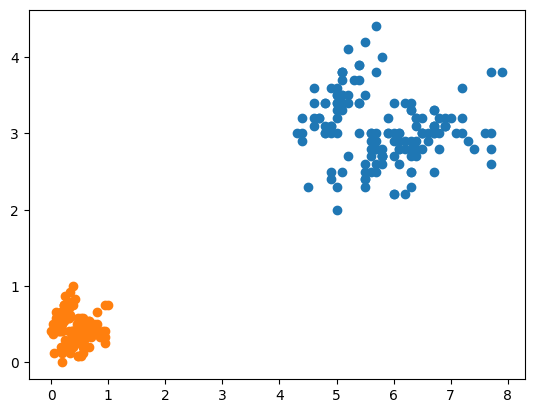

In [49]:
iris = load_iris()
X = iris.data

x_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:,0], X[:,1])
plt.scatter(x_minmax[:,0], x_minmax[:,1])

### Standard scaler
mean = 0, std = 1

In [50]:
x = np.array([10,53,90,35])

In [51]:
scaler = StandardScaler()
scaler.fit_transform(x.reshape(-1,1))

array([[-1.26946296],
       [ 0.20585886],
       [ 1.47532181],
       [-0.41171772]])

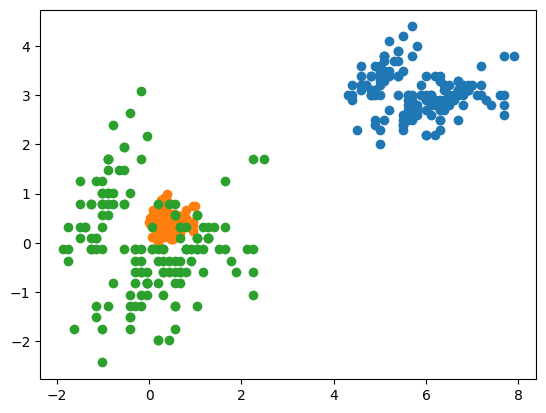

In [53]:
x_standard = StandardScaler().fit_transform(X)

plt.scatter(X[:,0], X[:,1])
plt.scatter(x_minmax[:,0], x_minmax[:,1])
plt.scatter(x_standard[:,0], x_standard[:,1])

## Robust scaler

x - median / IQR

peu sensible aux outliers

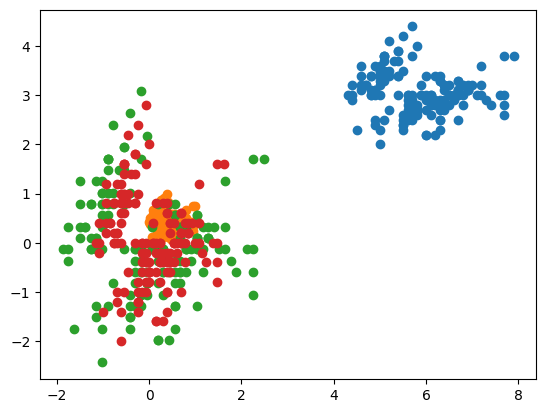

In [55]:
x_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:,0], X[:,1])
plt.scatter(x_minmax[:,0], x_minmax[:,1])
plt.scatter(x_standard[:,0], x_standard[:,1])
plt.scatter(x_robust[:,0], x_robust[:,1])

## Polynomial features

In [56]:
x = np.array([0.5, 1, 2])

In [57]:
PolynomialFeatures(3).fit_transform(x.reshape(-1,1))

array([[1.   , 0.5  , 0.25 , 0.125],
       [1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ]])

## Power transformer

(array([ 1.,  1.,  0.,  1.,  0.,  2.,  1.,  3.,  5.,  3.,  5.,  6.,  2.,
         9.,  6., 10.,  4.,  8.,  4.,  4.,  6.,  2.,  4.,  4.,  2.,  0.,
         5.,  0.,  1.,  1.]),
 array([-2.59662858, -2.43107764, -2.26552669, -2.09997575, -1.9344248 ,
        -1.76887386, -1.60332292, -1.43777197, -1.27222103, -1.10667009,
        -0.94111914, -0.7755682 , -0.61001726, -0.44446631, -0.27891537,
        -0.11336443,  0.05218652,  0.21773746,  0.38328841,  0.54883935,
         0.71439029,  0.87994124,  1.04549218,  1.21104312,  1.37659407,
         1.54214501,  1.70769595,  1.8732469 ,  2.03879784,  2.20434878,
         2.36989973]),
 <BarContainer object of 30 artists>)

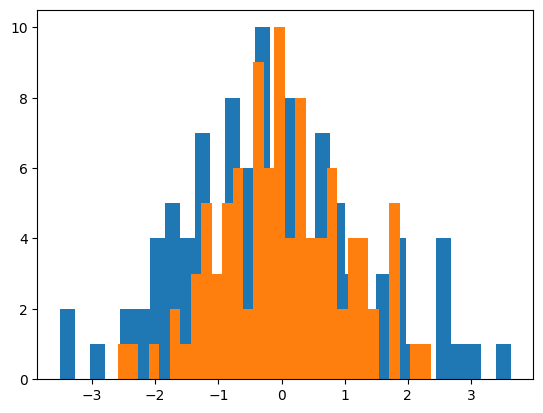

In [61]:
np.random.seed(0)
x = np.random.randn(100, 2) + np.random.randn(100, 2)

X2 = PowerTransformer().fit_transform(x)

plt.hist(x[:,0], bins=30)
plt.hist(X2[:,0], bins=30)

# Discretisation

## Binerizer

In [67]:
X = np.linspace(0, 3, 10).reshape(-1, 1)

In [68]:
Binarizer(threshold=2).fit_transform(X)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]])

## KBinsDiscretizer

In [70]:
KBinsDiscretizer(n_bins=4).fit_transform(X).toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])